In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
# считываем датасет из csv
df = pd.read_csv('/content/drive/MyDrive/GymData/gym_members_exercise_tracking.csv')
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


# Датасет: данные о посетителях спортзала
Age	Возраст  
Gender	Пол   
Weight (kg)	Вес (кг)  
Height (m)	Рост (м)  
Max_BPM	Максимальная частота сердцебиения   
Avg_BPM	Средняя частота сердцебиения   
Resting_BPM	Частота сердцебиения в состоянии покоя  
Session_Duration (hours)	Длительность сессии   
Calories_Burned	Сожжено калорий  
Workout_Type	Тип тренировки  
Fat_Percentage	Процент жира  
Water_Intake (liters)	Выпил воды (л)  
Workout_Frequency (days/week)	  
Experience_Level	Уровень опыта   
BMI Индекс массы тела  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [6]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [7]:
df.isnull().sum()

,0
Age,0
Gender,0
Weight (kg),0
Height (m),0
Max_BPM,0
Avg_BPM,0
Resting_BPM,0
Session_Duration (hours),0
Calories_Burned,0
Workout_Type,0


In [8]:
# преобразуем категориальные данные в численные
ohe = OneHotEncoder()
ohe.fit(df[['Gender']])
transformed = ohe.transform(df['Gender'].to_numpy().reshape(-1, 1))
ohe_df = pd.DataFrame(transformed.toarray(), columns=ohe.get_feature_names_out())
df = pd.concat([df, ohe_df], axis=1).drop(['Gender'], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [9]:
# посмотрим, что получилось
df.head(4)

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Female,Gender_Male
0,56,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20,0.0,1.0
1,46,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00,1.0,0.0
2,32,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71,1.0,0.0
3,25,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41,0.0,1.0


In [10]:
# то же самое с Workout_Type
ohe2 = OneHotEncoder()
ohe2.fit(df[['Workout_Type']])
transformed = ohe2.transform(df['Workout_Type'].to_numpy().reshape(-1, 1))
ohe_df = pd.DataFrame(transformed.toarray(), columns=ohe2.get_feature_names_out())
df = pd.concat([df, ohe_df], axis=1).drop(['Workout_Type'], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [11]:
df.head(4)

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Female,Gender_Male,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,56,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20,0.0,1.0,0.0,0.0,0.0,1.0
1,46,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00,1.0,0.0,0.0,1.0,0.0,0.0
2,32,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71,1.0,0.0,1.0,0.0,0.0,0.0
3,25,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41,0.0,1.0,0.0,0.0,1.0,0.0


Text(0.5, 1.0, 'pearson correlation')

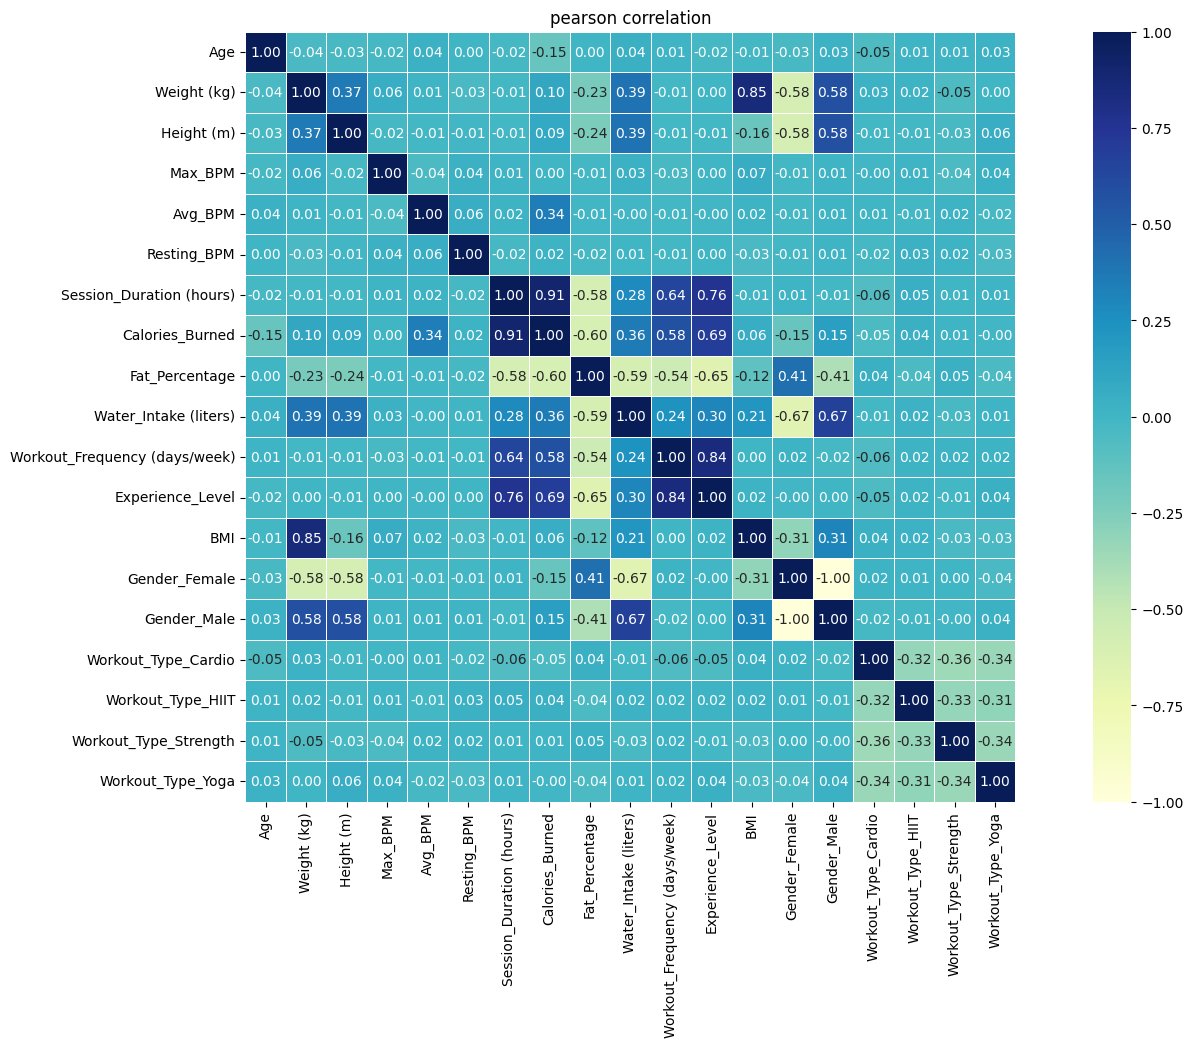

In [12]:
corr_matrix = df.copy()
plt.figure(figsize=(20, 10),dpi=100)

corr_matrix = corr_matrix.corr(method="pearson",numeric_only = True)

sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5, square=True)
plt.title("pearson correlation")

Для выбранной целевой переменной Calories_Burned, наиболее сильная линейная связь по коэф-ту Пирсона - с переменными Sesseion Duration (0.91), Fat Percentage (-0.6), Water Intake (0.36), Workout Frequency (0.58), Experience Level (0.69)

In [13]:
# целевая переменная будет - Calories_Burned
X = df.drop(['Calories_Burned'], axis=1)
y = df['Calories_Burned']

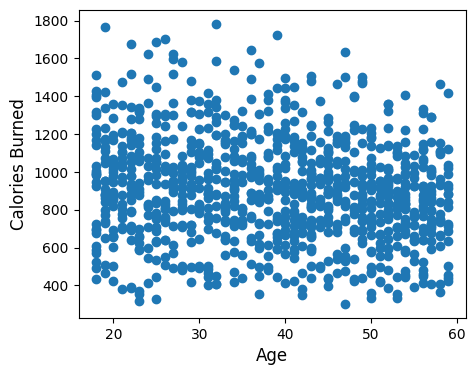

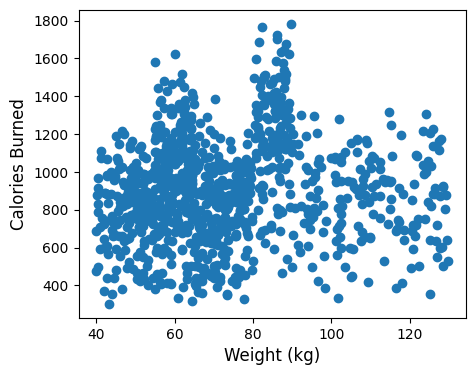

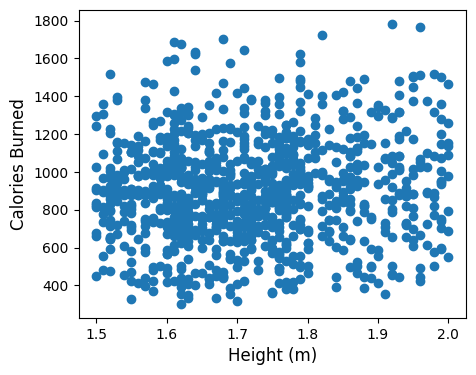

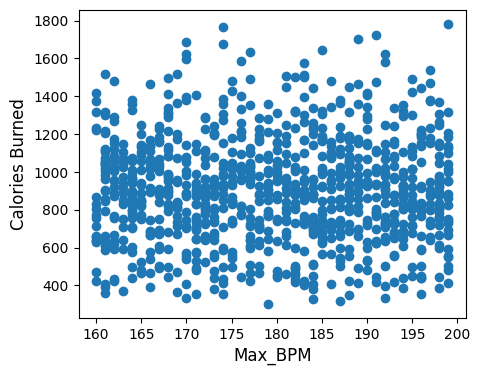

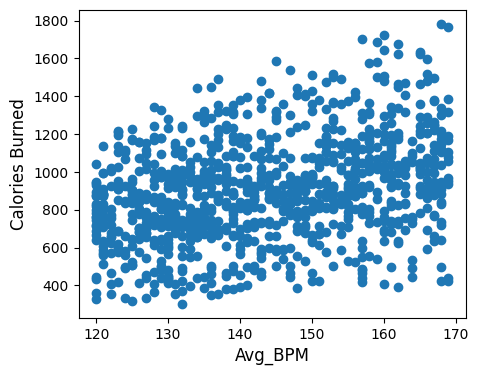

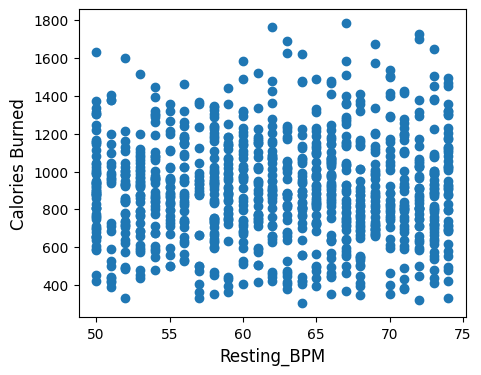

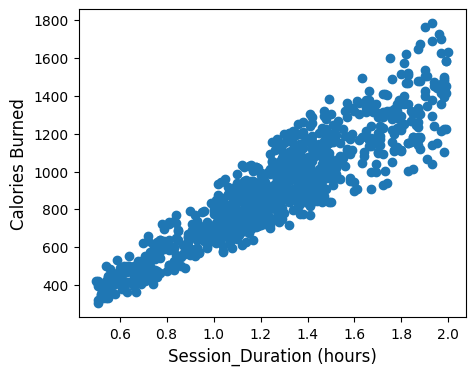

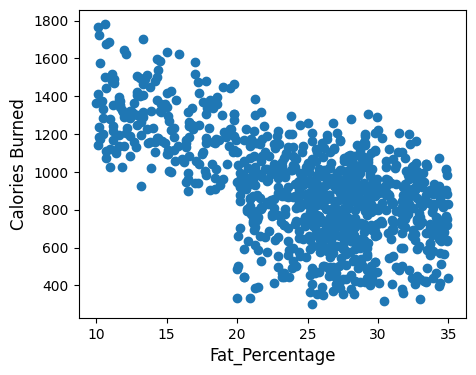

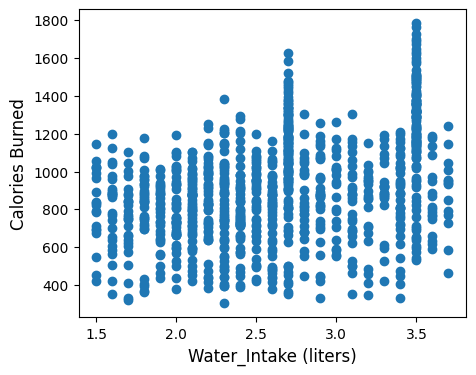

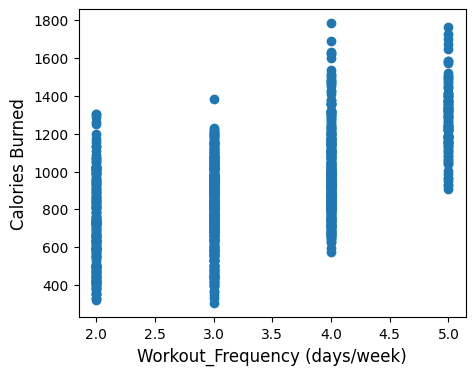

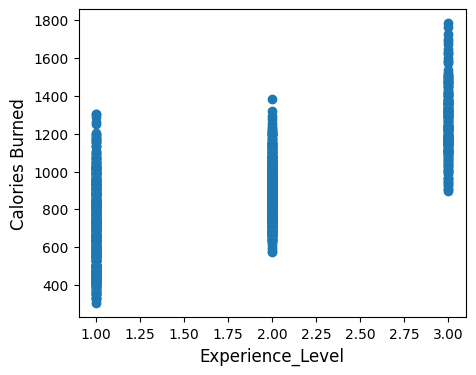

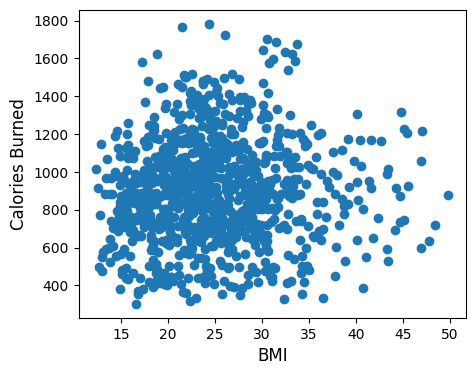

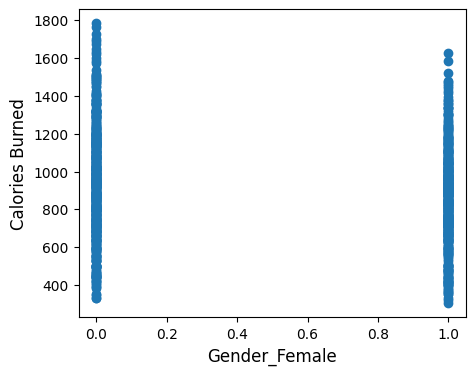

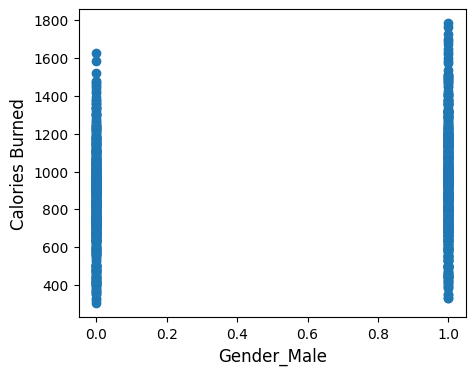

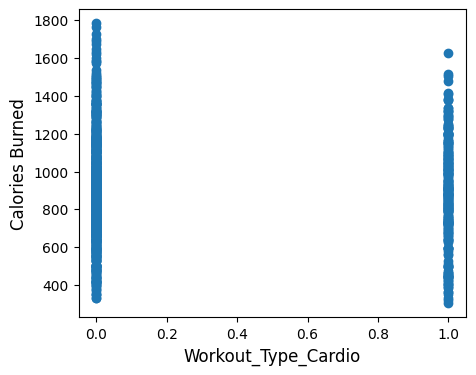

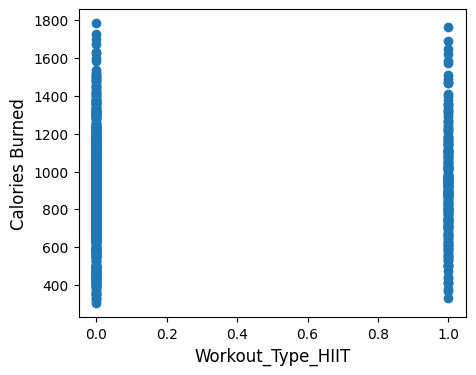

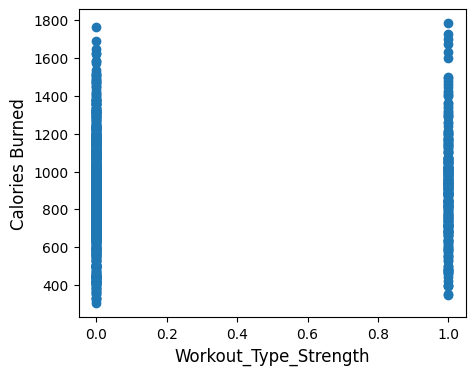

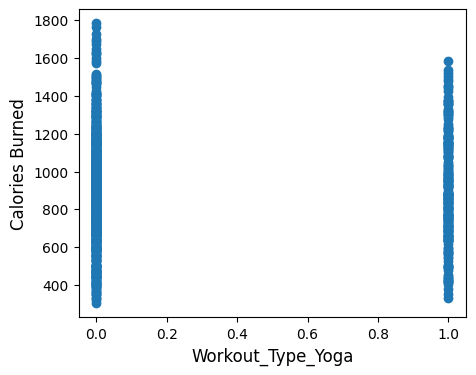

In [14]:
# посмотрим точечные графики

for feature_name in X.columns:
    plt.figure(figsize=(5, 4))
    plt.scatter(X[feature_name], y)
    plt.ylabel('Calories Burned', size=12)
    plt.xlabel(feature_name, size=12)
    plt.show()

по точеченым графикам наиболее явно видно линейную зависисмость Calories Burned с уровнем опыта, частотой занятий, процентом жира, длительность занятия.

In [15]:
# поделим данные на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [16]:
# нормализуем данные

sc = StandardScaler()
x = sc.fit_transform(X_train)
X_train = pd.DataFrame(x, columns=X_train.columns, index=X_train.index)
X_train.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Female,Gender_Male,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
408,0.596348,1.655347,-0.631716,0.465511,1.762343,0.088740,0.409090,-0.709610,1.293985,-0.351106,-1.094489,2.331966,-0.959681,0.959681,-0.592195,-0.522802,1.639269,-0.584277
556,-1.618840,-0.790082,1.154337,-0.148332,-0.391949,1.041948,-1.895963,-0.262365,1.792773,-0.351106,-1.094489,-1.292184,-0.959681,0.959681,1.688634,-0.522802,-0.610028,-0.584277
250,-0.224092,1.235996,2.086191,0.816279,0.233490,1.450465,0.204845,-0.645718,-0.202379,-0.351106,-1.094489,0.050760,-0.959681,0.959681,-0.592195,-0.522802,-0.610028,1.711518
531,1.170656,-0.959707,0.144829,-0.586792,0.858930,-1.136813,0.321557,1.159238,-1.366217,-0.351106,0.254976,-1.092841,1.042013,-1.042013,-0.592195,-0.522802,1.639269,-0.584277
864,-0.880444,-0.832488,-1.718879,1.167047,-1.086883,-0.864468,1.984696,-1.316587,0.130146,1.834176,1.604441,-0.000200,1.042013,-1.042013,-0.592195,-0.522802,1.639269,-0.584277


In [17]:
x = sc.transform(X_test)
X_test = pd.DataFrame(x, columns=X_test.columns, index=X_test.index)
X_test.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Female,Gender_Male,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
299,0.514304,0.910881,1.464955,-0.411408,-0.044483,-1.000641,-0.670491,0.376558,1.792773,-0.351106,0.254976,0.089729,-0.959681,0.959681,1.688634,-0.522802,-0.610028,-0.584277
819,-0.716356,-0.568627,-1.563570,-0.148332,-0.391949,1.178120,1.517850,-0.869341,0.130146,0.741535,1.604441,0.265091,1.042013,-1.042013,1.688634,-0.522802,-0.610028,-0.584277
608,-0.552268,-0.521509,-0.709371,0.903971,1.206397,-0.592123,1.196893,-1.588129,0.130146,1.834176,1.604441,-0.199544,1.042013,-1.042013,-0.592195,1.912768,-0.610028,-0.584277
926,0.022040,1.349079,1.697919,1.079355,-0.669923,-1.681504,-1.078982,-0.326257,-0.368641,-0.351106,-1.094489,0.343030,-0.959681,0.959681,-0.592195,-0.522802,-0.610028,1.711518
552,1.498832,-0.554492,-1.563570,-1.025252,-0.044483,-1.545331,-0.991448,0.552261,-0.036116,-0.351106,-1.094489,0.284576,1.042013,-1.042013,-0.592195,1.912768,-0.610028,-0.584277


In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from collections import Counter

In [19]:
def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    # Calculating Adjusted R-squared
    r2 = model.score(X_test, y_test)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    print(f'RMSE:  {round(RMSE,4)}\n  R2: {round(R2,4)}\n Adjusted R2: {round(adjusted_r2, 4)}\n Cross Validated R2: {round(cv_score.mean(),4)}')
    return R2, adjusted_r2, CV_R2, RMSE

# Посмотрим разные методы регрессии

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [21]:
# модели, которые будем рассматривать
models = {
    "Linear Regression": LinearRegression(),
    "Polynomial Regression": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    "Decision Tree Regression": DecisionTreeRegressor(random_state  = 15),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100, random_state=15),
    "Support Vector Regression": SVR(kernel='linear'),
    "Elastic Net": ElasticNet(alpha=0.1, l1_ratio=0.8)
}

In [22]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    mse_test = mean_squared_error(y_test, y_pred_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)

    print(f'{model_name}:')
    print(f'R² на тренировочных данных: {r2_train:.4f}')
    print(f'R² на тестовых данных: {r2_test:.4f}')
    print(f'MAE на тестовых данных: {mae_test:.4f}')
    print(f'MSE на тестовых данных: {mse_test:.4f}\n')
    return r2_test

In [23]:
results = {}
for model_name, model in models.items():
    r2_test = evaluate_model(model, X_train, X_test, y_train, y_test, model_name)
    results[model_name] = r2_test

Linear Regression:
R² на тренировочных данных: 0.9790
R² на тестовых данных: 0.9803
MAE на тестовых данных: 28.7196
MSE на тестовых данных: 1470.0973

Polynomial Regression:
R² на тренировочных данных: 0.9934
R² на тестовых данных: 0.9896
MAE на тестовых данных: 21.3678
MSE на тестовых данных: 777.9983

Decision Tree Regression:
R² на тренировочных данных: 1.0000
R² на тестовых данных: 0.9281
MAE на тестовых данных: 54.4821
MSE на тестовых данных: 5376.7590

Random Forest Regression:
R² на тренировочных данных: 0.9963
R² на тестовых данных: 0.9720
MAE на тестовых данных: 35.7012
MSE на тестовых данных: 2091.7630

Support Vector Regression:
R² на тренировочных данных: 0.9697
R² на тестовых данных: 0.9683
MAE на тестовых данных: 35.5355
MSE на тестовых данных: 2373.0763

Elastic Net:
R² на тренировочных данных: 0.9782
R² на тестовых данных: 0.9782
MAE на тестовых данных: 30.0121
MSE на тестовых данных: 1627.4696



По R2, MAE и MSE наилучшим образом себя показали полиномиальная регрессия, линейная регрессия, ElasticNet:

ElasticNet имеет сопоставимые значения R2 как на тестовых, так и на тренировочных данных, что говорит об отсутсвии переобучения. (3е место по значению R2 на тестовых)

PolynomialRegression имеет самое высокое значение R2 на тестовых данных.

LinearRegression имеет 2-е высочайшее значение R2 на тестовых данных.

#Линейная регрессия

In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
_ = Reg_Models_Evaluation_Metrics(lr, X_train, y_train, X_test, y_test, y_pred_lr)

RMSE:  38.3418
  R2: 0.9803
 Adjusted R2: 0.9783
 Cross Validated R2: 0.9777


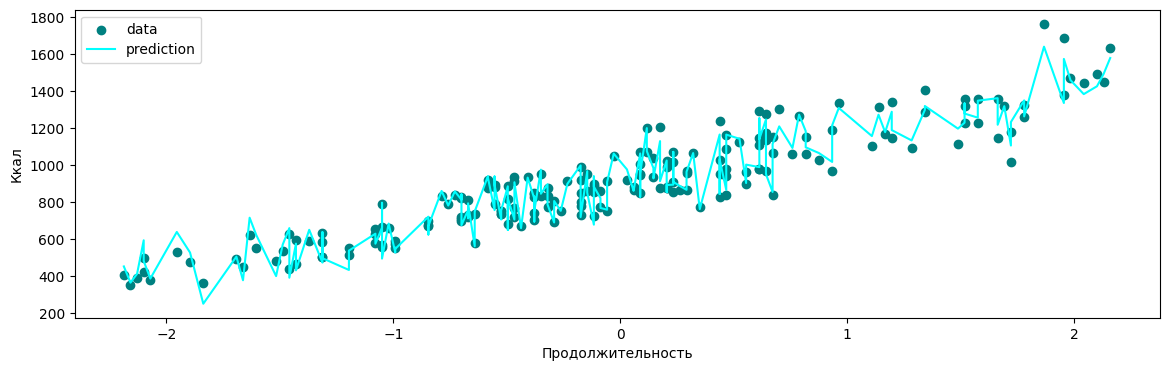

In [25]:
plt.rcParams["figure.figsize"] = (14,4)
plt.scatter(X_test["Session_Duration (hours)"], y_test, color='teal',
            label='data')
sort = X_test.sort_values(by='Session_Duration (hours)')
plt.plot(sort["Session_Duration (hours)"], lr.predict(sort), color='cyan',
         label='prediction')
plt.xlabel('Продолжительность')
plt.ylabel('Ккал')
plt.legend()
plt.show()

# Полиномиальная регрессия

In [26]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly_features = poly.fit_transform(X)
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(poly_features, y, test_size=0.2, random_state=15)

pr = LinearRegression()
pr.fit(X_p_train, y_p_train)
y_pred_pr = pr.predict(X_p_test)
_ = Reg_Models_Evaluation_Metrics(pr, X_p_train, y_p_train,  X_p_test, y_p_test, y_pred_pr)

RMSE:  83.5001
  R2: 0.9068
 Adjusted R2: 1.0005
 Cross Validated R2: 0.8743


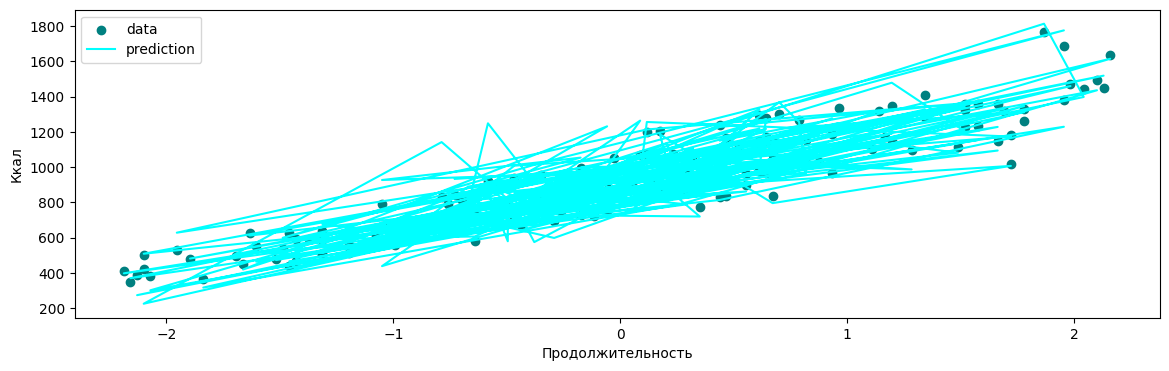

In [27]:
plt.rcParams["figure.figsize"] = (14,4)
plt.scatter(X_test["Session_Duration (hours)"], y_test, color='teal',
            label='data')

plt.plot(X_test["Session_Duration (hours)"], pr.predict(X_p_test), color='cyan',
         label='prediction')
plt.xlabel('Продолжительность')
plt.ylabel('Ккал')
plt.legend()
plt.show()


# Регрессия дерева принятия решений

In [ ]:
dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
_ = Reg_Models_Evaluation_Metrics(dt, X_train, y_train,  X_test, y_test, y_pred_dt)

RMSE:  70.8877
  R2: 0.9328
 Adjusted R2: 0.926
 Cross Validated R2: 0.9285


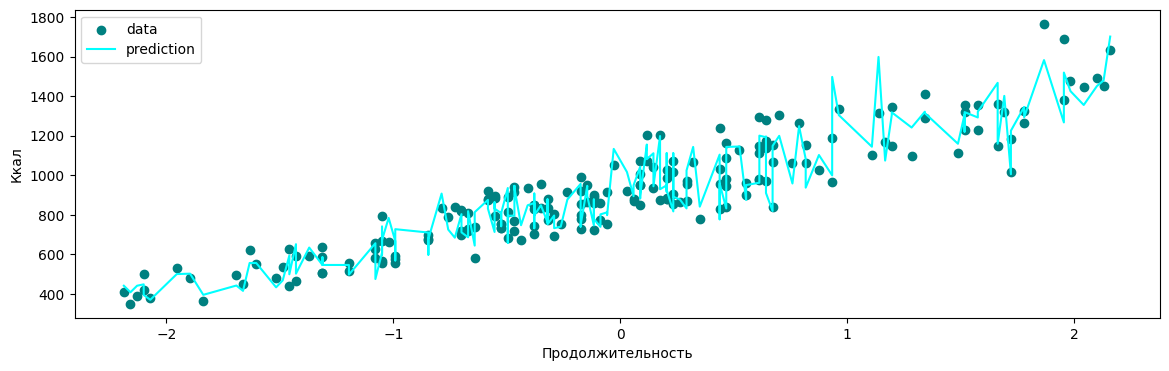

In [ ]:
plt.rcParams["figure.figsize"] = (14,4)
plt.scatter(X_test["Session_Duration (hours)"], y_test, color='teal',
            label='data')
#sort = X_test.sort_values(by='Session_Duration (hours)')
plt.plot(sort["Session_Duration (hours)"], dt.predict(sort), color='cyan',
         label='prediction')
plt.xlabel('Продолжительность')
plt.ylabel('Ккал')
plt.legend()
plt.show()

# Регрессия случайного леса

In [ ]:
# Create a stepwise regression model
rf = RandomForestRegressor(n_estimators=100)

# Fit the model to the data
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(rf, X_train, y_train,  X_test, y_test, y_pred_rf)

RMSE:  45.0579
  R2: 0.9729
 Adjusted R2: 0.9701
 Cross Validated R2: 0.9721


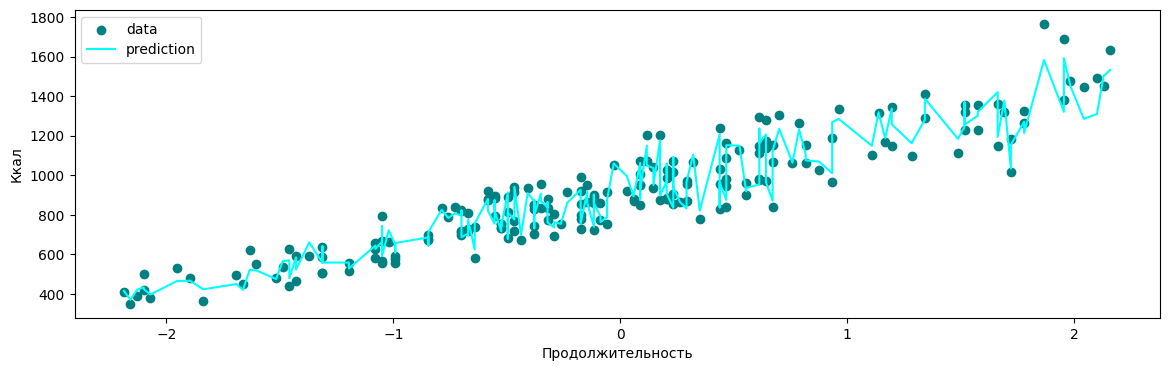

In [ ]:
plt.rcParams["figure.figsize"] = (14,4)
plt.scatter(X_test["Session_Duration (hours)"], y_test, color='teal',
            label='data')
plt.plot(sort["Session_Duration (hours)"], rf.predict(sort), color='cyan',
         label='prediction')
plt.xlabel('Продолжительность')
plt.ylabel('Ккал')
plt.legend()
plt.show()

# Регрессия опорных векторов (SVR)

In [ ]:

# Create a support vector regression model
svr = SVR(kernel='linear')

svr.fit(X_train, y_train)

y_pred_svr = svr.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(svr, X_train, y_train,  X_test, y_test, y_pred_svr)

RMSE:  48.7142
  R2: 0.9683
 Adjusted R2: 0.965
 Cross Validated R2: 0.9675


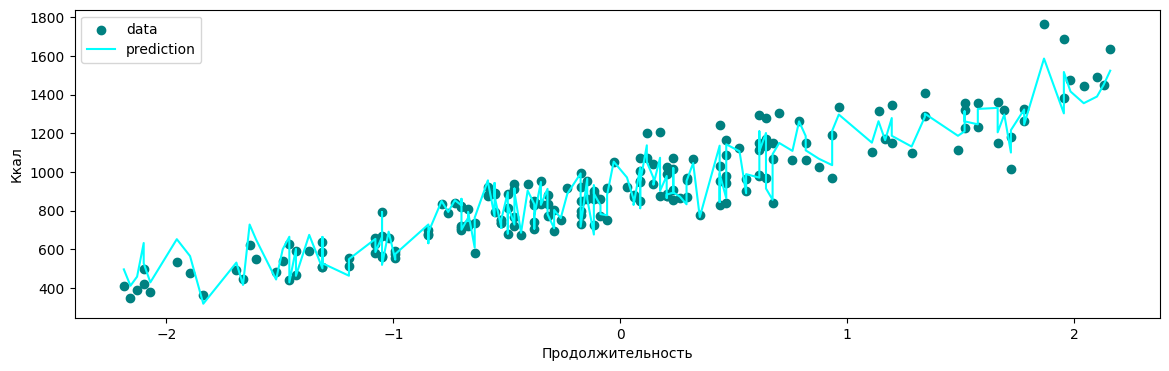

In [ ]:
plt.rcParams["figure.figsize"] = (14,4)
plt.scatter(X_test["Session_Duration (hours)"], y_test, color='teal',
            label='data')
plt.plot(sort["Session_Duration (hours)"], svr.predict(sort), color='cyan',
         label='prediction')
plt.xlabel('Продолжительность')
plt.ylabel('Ккал')
plt.legend()
plt.show()

# Регрессия ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet

# Create an elastic net regression model
en = ElasticNet(alpha=0.1, l1_ratio=0.8)

# Fit the model to the data
en.fit(X_train, y_train)
y_pred_en = en.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(rf, X_train, y_train,  X_test, y_test, y_pred_en)

RMSE:  40.3419
  R2: 0.9729
 Adjusted R2: 0.9701
 Cross Validated R2: 0.9727


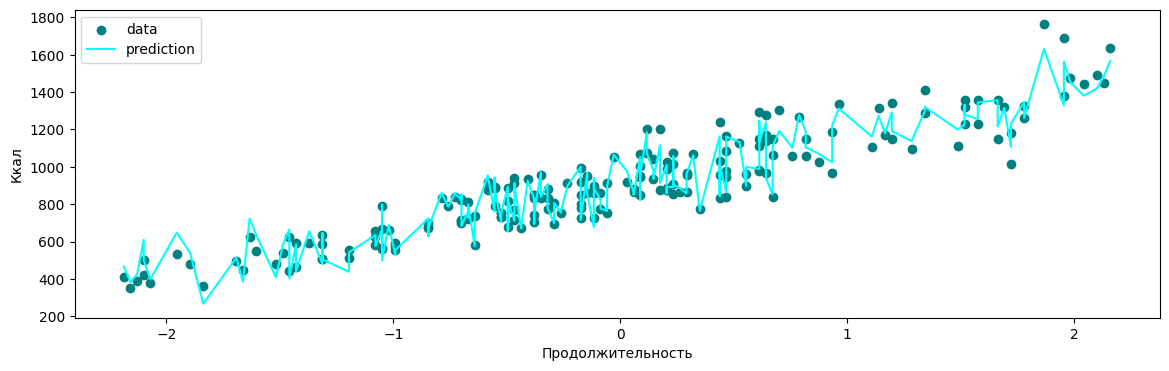

In [ ]:
plt.rcParams["figure.figsize"] = (14,4)
plt.scatter(X_test["Session_Duration (hours)"], y_test, color='teal',
            label='data')
plt.plot(sort["Session_Duration (hours)"], en.predict(sort), color='cyan',
         label='prediction')
plt.xlabel('Продолжительность')
plt.ylabel('Ккал')
plt.legend()
plt.show()